<a href="https://colab.research.google.com/github/valdenio458/livro-python-para-analise-de-dados/blob/main/capitulo_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotagem e visualização

## 9.1 Introdução rápida à API do matplotlib

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = np.arange(10)

In [ ]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

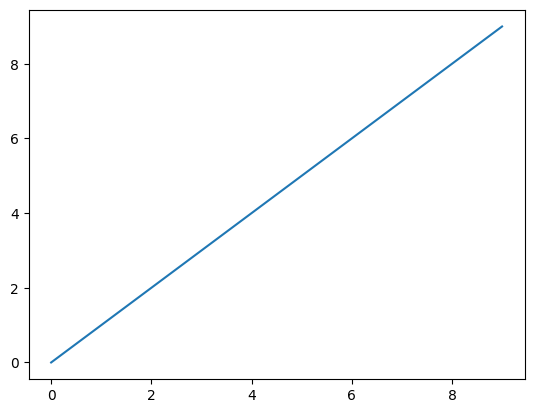

In [ ]:
plt.plot(data)

### Figuras e subplotagens

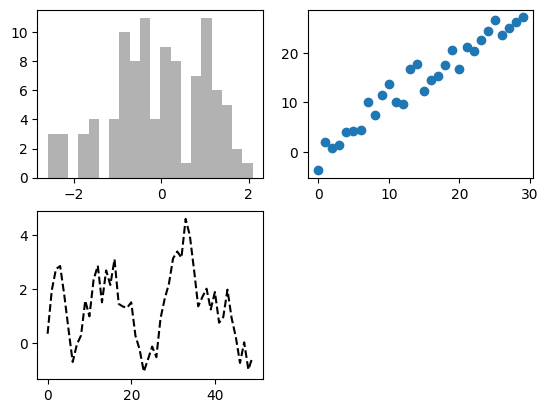

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')
ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3);
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30));

### Cores, marcadores e estilos de linhas

In [ ]:
x = [2, 4, 6]
y = [5, 7, 9]

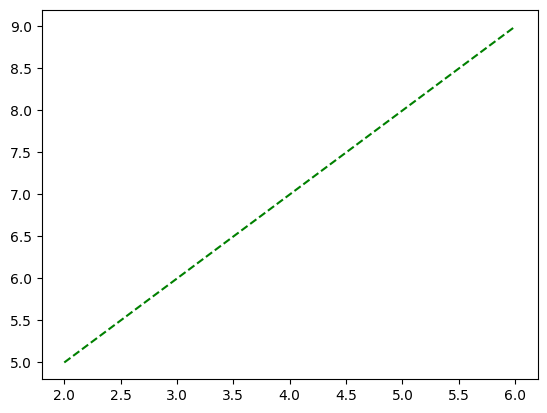

In [ ]:
# Informa o estilo da linha e sua cor
plt.plot(x, y, 'g--')

# Este código poderia ter sido escrito mais explicitamente, assim:
# plt.plot(x, y, linestyle='--', color='green')

In [ ]:
from numpy.random import randn

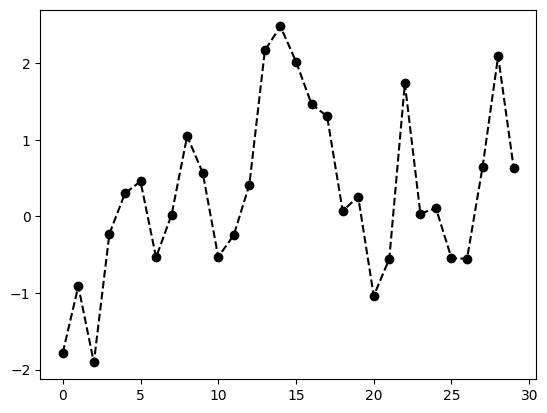

In [ ]:
# .cumsum(): Realiza a soma cumulativa dos números aleatórios gerados.
# Cada elemento no array resultante é a soma acumulativa dos elementos anteriores.

# 'ko--': Define o estilo da linha no gráfico. 'k' significa preto (black),
# 'o' significa marcadores redondos e '--' significa linha tracejada.

plt.plot(randn(30).cumsum(), 'ko--')

# Este código poderia ter sido escrito mais explicitamente, assim:
# plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

### Tiques, rótulos e legendas

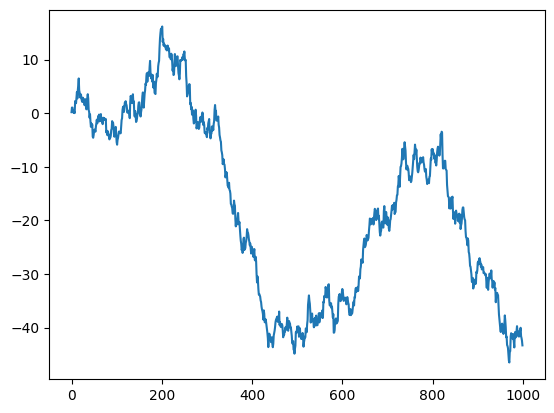

In [ ]:
# Os tiques são os valores ao longo dos eixos, indicando pontos específicos nos gráficos.
# Esses valores ajudam a entender a escala e interpretar os dados visualmente.
# Os tiques podem estar ao longo do eixo x, do eixo y ou de qualquer outro eixo em um gráfico.
# Em resumo, os tiques são as marcas numéricas ao longo dos eixos.
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

Text(0.5, 1.0, 'My first matplotlib plot')

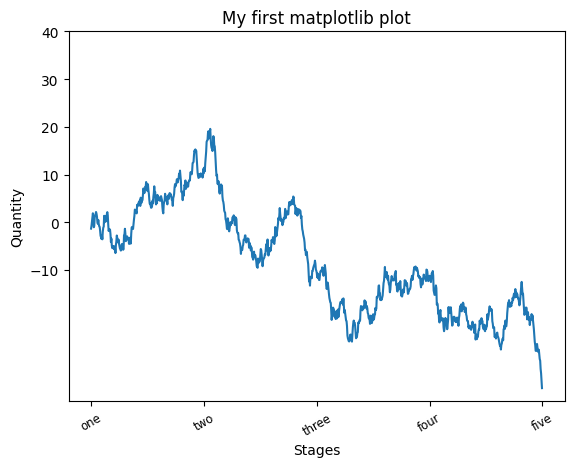

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
ticks = ax.set_yticks([-10, 0, 10, 20, 30, 40])
labels = ax.set_xticklabels(['one', 'two', 'three','four', 'five'], rotation=30, fontsize='small')
ax.set_xlabel('Stages')
ax.set_ylabel('Quantity')
ax.set_title('My first matplotlib plot')

### Acrescentando legendas

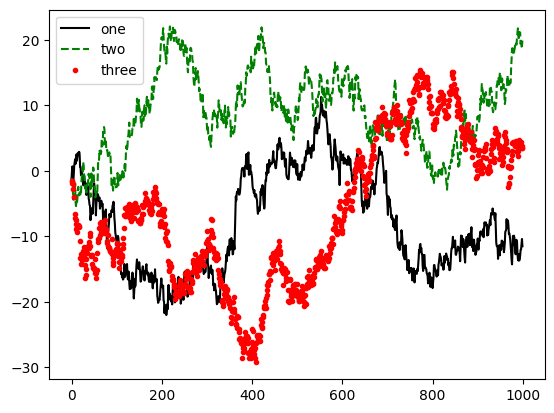

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'g--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'r.', label='three')
ax.legend(loc='best')

### Anotações e desenhos em uma subplotagem

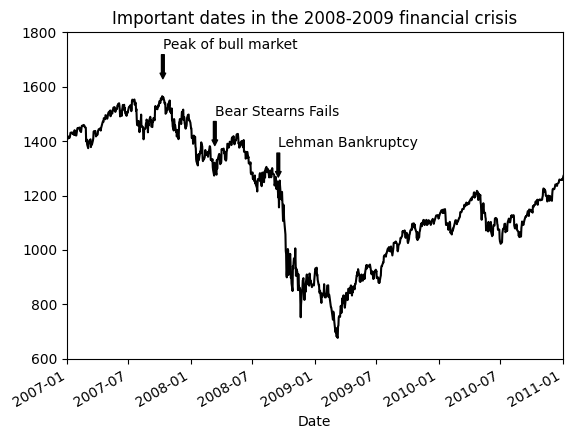

In [7]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('/content/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
  ax.annotate(label, xy=(date, spx.asof(date) + 75),
              xytext=(date, spx.asof(date) + 225),
              arrowprops=dict(facecolor='black', headwidth=4, width=2,
                              headlength=4),
              horizontalalignment='left', verticalalignment='top'
              )
# Faz um zoom no período de 2007 a 2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')
plt.show()

### Salvando plotagens em arquivos

In [ ]:
# Informa o diretório atual
import os
os.getcwd()

'/content'

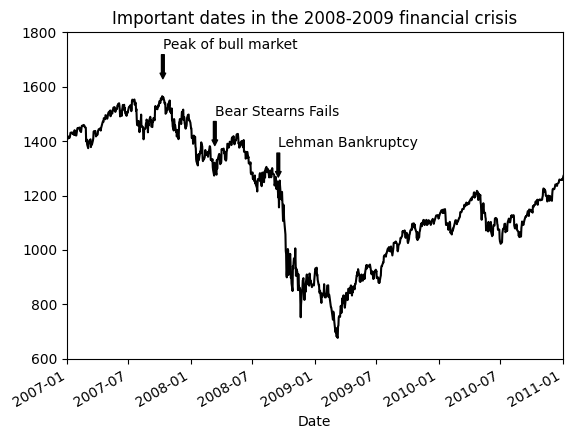

<Figure size 640x480 with 0 Axes>

In [6]:
# O mesmo código anterior
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('/content/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top'
                )
# Faz um zoom no período de 2007 a 2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')

# Exibir a figura antes de salvar
plt.show()

# Agora salvar a figura após a exibição
plt.savefig('/content/figpath.svg')


## 9.2 Plotagem com o pandas e o seaborn

### Plotagens de linha

In [8]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

<Axes: >

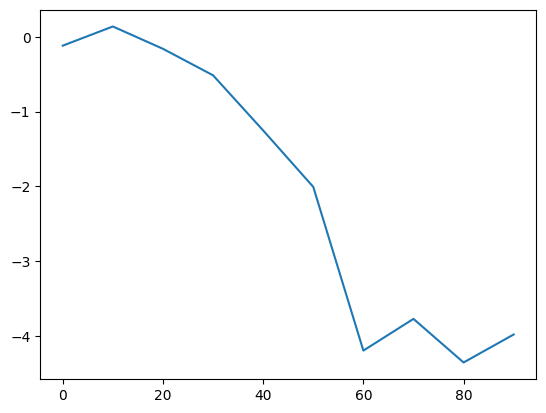

In [9]:
s.plot()

In [10]:
#  np.random.randn(10, 4): Gera uma matriz 10x4 de números aleatórios distribuídos normalmente.
# .cumsum(0): Calcula a soma acumulativa ao longo do eixo 0 (ao longo das colunas) para cada linha na matriz gerada anteriormente. Isso cria uma sequência cumulativa de valores para cada coluna.

# columns=['A', 'B', 'C', 'D']: Define os nomes das colunas do DataFrame como 'A', 'B', 'C' e 'D'.

# index=np.arange(0, 100, 10): Define os índices das linhas do DataFrame usando uma sequência de números de 0 a 90,
# com incrementos de 10.


df = pd.DataFrame(np.random.randn(10,4).cumsum(0),
                  columns=['A','B', 'C', 'D'],
                  index=np.arange(0, 100, 10)
                  )

<Axes: >

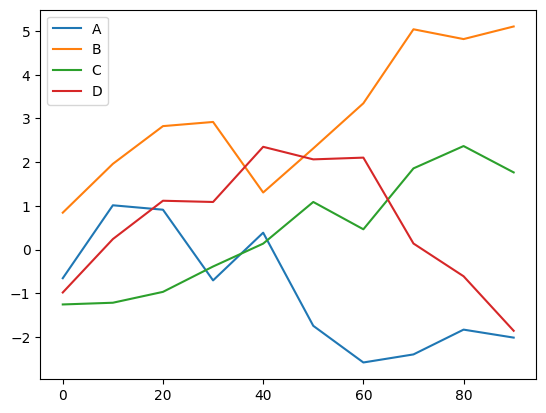

In [11]:
df.plot()